In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('data/data.csv', encoding='latin1')
abusive = pd.read_csv('data/abusive.csv', encoding='latin1')
new_kamusalay = pd.read_csv('data/new_kamusalay.csv', encoding='latin1')

In [3]:
abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [4]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
new_kamusalay

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [6]:
new_kamus_alay = {}
for k,v in new_kamusalay.values:
    new_kamus_alay[k] = v
print(new_kamus_alay)

{'pakcikdahtua': 'pak cik sudah tua', 'pakcikmudalagi': 'pak cik muda lagi', 't3tapjokowi': 'tetap jokowi', '3x': 'tiga kali', 'aamiin': 'amin', 'aamiinn': 'amin', 'aamin': 'amin', 'aammiin': 'amin', 'abis': 'habis', 'abisin': 'habiskan', 'acau': 'kacau', 'achok': 'ahok', 'ad': 'ada', 'adek': 'adik', 'adl': 'adalah', 'adlah': 'adalah', 'adlh': 'adalah', 'ado': 'ada', 'aduhh': 'aduh', 'aer': 'air', 'afdol': 'afdal', 'agamaataualqur': 'agama alquran', 'agm': 'agama', 'agma': 'agama', 'ahaha': 'haha', 'ahahaha': 'haha', 'ahehehehe': 'hehe', 'ahir': 'akhir', 'ahirnya': 'akhirnya', 'ahk': 'ahok', 'ahlamdulillah': 'alhamdulillah', 'ahli2': 'para ahli', 'ahlusunnah': 'ahlus sunah', 'ahmaddani': 'ahmad dhani', 'aho': 'ahok', 'ahoax': 'ahok', 'ahoaxx': 'ahok', 'ahog': 'ahok', 'ahokataudjarot': 'ahok djarot', 'ahokbebanijokowi': 'ahok beban jokowi', 'ahokbtp': 'ahok basuki tjahaja purnama', 'ahokditolakwarga': 'ahok ditolak warga', 'ahokdjarot': 'ahok djarot', 'ahokdjarotterbukti': 'ahok djarot 

In [7]:
new_kamus_alay

{'pakcikdahtua': 'pak cik sudah tua',
 'pakcikmudalagi': 'pak cik muda lagi',
 't3tapjokowi': 'tetap jokowi',
 '3x': 'tiga kali',
 'aamiin': 'amin',
 'aamiinn': 'amin',
 'aamin': 'amin',
 'aammiin': 'amin',
 'abis': 'habis',
 'abisin': 'habiskan',
 'acau': 'kacau',
 'achok': 'ahok',
 'ad': 'ada',
 'adek': 'adik',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'ado': 'ada',
 'aduhh': 'aduh',
 'aer': 'air',
 'afdol': 'afdal',
 'agamaataualqur': 'agama alquran',
 'agm': 'agama',
 'agma': 'agama',
 'ahaha': 'haha',
 'ahahaha': 'haha',
 'ahehehehe': 'hehe',
 'ahir': 'akhir',
 'ahirnya': 'akhirnya',
 'ahk': 'ahok',
 'ahlamdulillah': 'alhamdulillah',
 'ahli2': 'para ahli',
 'ahlusunnah': 'ahlus sunah',
 'ahmaddani': 'ahmad dhani',
 'aho': 'ahok',
 'ahoax': 'ahok',
 'ahoaxx': 'ahok',
 'ahog': 'ahok',
 'ahokataudjarot': 'ahok djarot',
 'ahokbebanijokowi': 'ahok beban jokowi',
 'ahokbtp': 'ahok basuki tjahaja purnama',
 'ahokditolakwarga': 'ahok ditolak warga',
 'ahokdjarot': 'ahok dj

In [8]:
for k,v in df.isnull().sum().items():
    print(k,v)

Tweet 0
HS 0
Abusive 0
HS_Individual 0
HS_Group 0
HS_Religion 0
HS_Race 0
HS_Physical 0
HS_Gender 0
HS_Other 0
HS_Weak 0
HS_Moderate 0
HS_Strong 0


In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13044 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13044 non-null  object
 1   HS             13044 non-null  int64 
 2   Abusive        13044 non-null  int64 
 3   HS_Individual  13044 non-null  int64 
 4   HS_Group       13044 non-null  int64 
 5   HS_Religion    13044 non-null  int64 
 6   HS_Race        13044 non-null  int64 
 7   HS_Physical    13044 non-null  int64 
 8   HS_Gender      13044 non-null  int64 
 9   HS_Other       13044 non-null  int64 
 10  HS_Weak        13044 non-null  int64 
 11  HS_Moderate    13044 non-null  int64 
 12  HS_Strong      13044 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.4+ MB


In [11]:
tweets = df['Tweet'].tolist()

In [12]:
tweets = list(tweets)

In [13]:
tweets

["- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'",
 "RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'",
 '41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter',
 "USER USER AKU ITU AKU\\n\\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'",
 "USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'",
 "USER Ya bani taplak dkk \\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84'",
 'deklarasi pilkada 2018 aman dan anti hoax warga dukuh sari jabon',
 'Gue baru aja kelar re-watch Aldnoah Zero!!! paling kampret emang endingnya! 2 karakter utama cowonya kena friendzone bray! XD URL',
 'Na

In [14]:
text =  "USER USER AKU ITU AKU\\n\\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'"

In [15]:
print(f'lowercasing: {text.lower()}')
print("")
print(f'uppercasing: {text.upper()}')
print("")
print(f'titlecasing: {text.title()}')

lowercasing: user user aku itu aku\n\nku tau matamu sipit tapi diliat dari mana itu aku'

uppercasing: USER USER AKU ITU AKU\N\NKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'

titlecasing: User User Aku Itu Aku\N\Nku Tau Matamu Sipit Tapi Diliat Dari Mana Itu Aku'


### Membuat Function Cleansing Text

In [16]:
re.sub(r'[^\w\s]', '', text)

'USER USER AKU ITU AKUnnKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'

In [17]:
texts = ["Nomor ini bermula dari telepon seluler SBY john.smith@gmail.com yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.",
         "Nomor ini bermula dari telepon seluler SBY alex.jones21@yahoo.com yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.",
         "Nomor ini bermula dari telepon seluler SBY lisa.walker@hotmail.co.id yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.",
         "Nomor ini bermula dari telepon seluler SBY lisa21walker@hotmail.com yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.",
         "Nomor ini bermula dari telepon seluler SBY miacarter@gmail.com yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.",
         "Nomor ini bermula dari telepon seluler SBY amandaroberts@21gmail.com yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.",
         "Nomor ini bermula dari telepon seluler SBY 21miacarter@yahoo.co dan +6281123994901 yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.",
        ]

for text in texts:
    cleansing_result = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', 'EMAIL', text)
    print("Original Text")
    print(text)
    print("")
    print("Cleasing Text")
    print(cleansing_result)
    print("")
    print("")
    print("")

Original Text
Nomor ini bermula dari telepon seluler SBY john.smith@gmail.com yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.

Cleasing Text
Nomor ini bermula dari telepon seluler SBY EMAIL yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.



Original Text
Nomor ini bermula dari telepon seluler SBY alex.jones21@yahoo.com yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.

Cleasing Text
Nomor ini bermula dari telepon seluler SBY EMAIL yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.



Original Text
Nomor ini bermula dari telepon seluler SBY lisa.walker@hotmail.co.id yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.

Cleasing Text
Nomor ini bermula dari telepon seluler SBY EMAIL yang jebol karena per menitnya mendapat SMS lebih dari ribuan SMS masuk.



Original Text
Nomor ini bermula dari telepon seluler SBY lisa21walker@hotmail.com yang jebol karena per menitnya mendapa

In [18]:
# def lower_process(sentence):
#     sentence = sentence.lower()
#     return sentence
    
# challenge_df.apply(lower_process)
# print(challenge_df)

In [19]:
# level sentence
# 1. jadikan lowercase semua
# 2. ganti nomor telepon ke kata 'NOMOR_TELEPON'
# 3. ganti email ke kata 'EMAIL'
# 4. hapus semua punctuation (tanda baca)
# 5. menghapus kata 'USER'
# 6. apaaaaaa? -> dihapus character yang muncul banyak gitu?

In [20]:
def cleaned_email (text) : 
    cleaned_email = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', 'EMAIL', text)
    return cleaned_email

In [21]:
def processing_word(input_text):
    new_text = [] # set up new list
    new_new_text = [] # set up new new list
    text = input_text.split(" ") # split input_text menjadi list of words
    for word in text: # untuk setiap word in 'text'
        if word in abusive['ABUSIVE'].tolist(): # check word di dalam list_of_abusive_words
            continue # jika ada, skip
        else:
            new_text.append(word) # jika tidak ada, masukkan ke dalam list new_text
   
    for word in new_text:
        new_word = new_kamus_alay.get(word, word) # check ke new_kamus_alay, apakah word ada di dictionarynya. kalau ga ada, return word yang sama. kalau ada, kembalikan value barunya (value yang ada di dict)
        new_new_text.append(new_word)
    
    text = " ".join(new_new_text)
    return text

In [22]:
def processing_text(input_text):
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', 'EMAIL', input_text) #ganti email ke kata 'EMAIL'
    text = text.lower() # jadikan lowercase semua
    text = re.sub(r'[^\w\s]', '', text) # hapus semua punctuation (tanda baca)
    text = text.replace(" 62"," 0")
    text = re.sub(r"\b\d{4}\s?\d{4}\s?\d{4}\b", "NOMOR_TELEPON", text) #ganti nomor telepon ke kata 'NOMOR_TELEPON'
    text = text.replace("USER","")
    text = text.strip()
    
    text = processing_word(text)
    return text

In [23]:
test_tweets = ["""
Yang pasti tidak berseragam United lagi: 
- Phil Jones
- Axel Tuanzebe
- Ethan Galbraith 
- Di’Shon Bernard 
- Eric Hanbury (Academy)
- Charlie Wellens (Academy)
- Manni Norkett (Academy) 

Thank you guys, and good luck 💪🏼
""","""lol korsel kagak nyalahin darimana, lah itu kedubes jepang tiap hari didemo ama warga lol.

Ampe detik ini masalah reparasi +6281123994901 jadi krikil hublu antar kedua negara.

Kemane aje lau.""",
          "Indonesia 78 amandaroberts@21gmail.co tahun sibuk bangun TH ngab, skrg baru TH 13, TH nya doang yg di upgrade jadinya prematur","""
"indonwsia 78 tahun ngapain aja?" bandinginnya jangan sama singapura, korsel, taiwan dong wkwkwk.

cuma mau nanya aja bang: lebih cepet ngebangun rumah kecil buat 50 juta orang, apa bikin rumah besar & luas buat 273 juta orang?"""]

In [24]:
for idx, tweet in enumerate(tweets):
    cleaned_tweet = processing_text(tweet)
    print(cleaned_tweet)
    
    if idx == 10:
        break

di saat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok
rt pengguna pengguna siapa yang telat memberi tau eluedan gue bergaul dengan cigax jifla calis sama siapa itu licew juga
41 kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkalikali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter
pengguna pengguna aku itu akunnku tau matamu tapi dilihat dari mana itu aku
pengguna pengguna kaum kafir sudah kelihatan dongoknya dari awal tambah lagi haha
pengguna ya dan kawan kawan xf0x9fx98x84xf0x9fx98x84xf0x9fx98x84
deklarasi pilihan kepala daerah 2018 aman dan anti hoaks warga dukuh sari jabon
gue baru saja selesai rewatch aldnoah zero paling memang akhirnya 2 karakter utama cowoknya kena friendzone bro xd uniform resource locator
nah admin belanja satu lagi port terbaik nak makan ais k

In [25]:
df['cleaned_new_tweet'] = df['Tweet'].apply(lambda x: processing_text(x))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1112\3360192824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_new_tweet'] = df['Tweet'].apply(lambda x: processing_text(x))


In [26]:
df[['Tweet', 'cleaned_new_tweet']]

,Tweet,cleaned_new_tweet
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt pengguna pengguna siapa yang telat memberi ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berpikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,pengguna pengguna aku itu akunnku tau matamu t...
4,USER USER Kaum cebong kapir udah keliatan dong...,pengguna pengguna kaum kafir sudah kelihatan d...
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,pengguna jangan asal berbicara ndasmu kamu yan...
13165,USER Kasur mana enak kunyuk',pengguna kasur mana enak
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,pengguna hati hati gnnlagi bosan duh xf0x9fx9...
13167,USER USER USER USER Bom yang real mudah terdet...,pengguna pengguna pengguna pengguna bom yang r...


In [27]:
max(df['cleaned_new_tweet'].apply(lambda x: len(x)))

484

### Membuat Database

In [28]:
import sqlite3

In [29]:
conn = sqlite3.connect("C:/Users/ASUS/DSC_binar/Challage Gold - Baseline/tmp.db")

In [30]:
conn.execute("""CREATE TABLE IF NOT EXISTS tweet_cleaning (id INTEGER PRIMARY KEY AUTOINCREMENT, previous_text char(1000), cleaned_text char(1000))""")
conn.commit()

In [31]:
conn

In [32]:
cursor=conn.cursor()

In [33]:
for idx,x in enumerate(df[['Tweet', 'cleaned_new_tweet']].values):
    print(idx,x[0],"---",x[1])
    if idx == 5:
        break

0 - disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !' --- di saat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok
1 RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga' --- rt pengguna pengguna siapa yang telat memberi tau eluedan gue bergaul dengan cigax jifla calis sama siapa itu licew juga
2 41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter --- 41 kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkalikali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berpisah ketika kakakku lebih memilih

In [34]:
for value_1, value_2 in df[['Tweet', 'cleaned_new_tweet']].values:
    value_1 = value_1.encode('utf-8')
    value_2 = value_2.encode('utf-8')
    query = f"INSERT INTO tweet_cleaning (previous_text,cleaned_text) VALUES (?, ?);"
    cursors = conn.execute(query, (value_1, value_2))
    conn.commit()


In [35]:
results = conn.execute(f'select * from tweet_cleaning')
results = [result for result in results]

In [36]:
results

[(1,
  b"- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'",
  b'di saat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok'),
 (2,
  b"RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'",
  b'rt pengguna pengguna siapa yang telat memberi tau eluedan gue bergaul dengan cigax jifla calis sama siapa itu licew juga'),
 (3,
  b'41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter',
  b'41 kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkalikali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berp

### Membuat API

### Dilanjutkan di script (sublime_text)

### Membuat Visualisasi untuk Reporting

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
### membandingkan penggunaan kata dengan tweet dan clean_tweet dengan wordcloud

In [55]:
from wordcloud import WordCloud

In [56]:
wordcloud_tweet=WordCloud().generate(" ".join(df["Tweet"]))

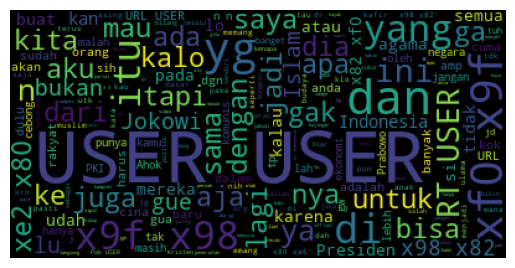

In [59]:
plt.imshow(wordcloud_tweet)
plt.axis("off")
plt.show()

In [62]:
wordcloud_clean_tweet=WordCloud().generate(" ".join(df["cleaned_new_tweet"]))

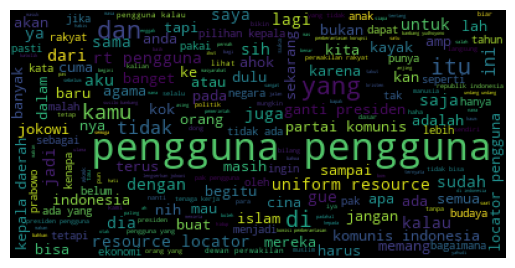

In [63]:
plt.imshow(wordcloud_clean_tweet)
plt.axis("off")
plt.show()

In [64]:
#dapat diketahu dari masing masing kata yang sering di gunakan, tampak penggunaan di cleantweet lebih beragam

In [38]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleaned_new_tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,rt pengguna pengguna siapa yang telat memberi ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berpikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,pengguna pengguna aku itu akunnku tau matamu t...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,pengguna pengguna kaum kafir sudah kelihatan d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,pengguna jangan asal berbicara ndasmu kamu yan...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,pengguna kasur mana enak
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,pengguna hati hati gnnlagi bosan duh xf0x9fx9...
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,pengguna pengguna pengguna pengguna bom yang r...


In [39]:
df.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong', 'cleaned_new_tweet'],
      dtype='object')

In [47]:
df["Length_of_tweet"]=df["Tweet"].apply(lambda x:len(x))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1112\397515241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Length_of_tweet"]=df["Tweet"].apply(lambda x:len(x))


In [48]:
df["Number_of_words_tweet"]=df["Tweet"].apply(lambda x:len(x.split(" ")))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1112\377822878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Number_of_words_tweet"]=df["Tweet"].apply(lambda x:len(x.split(" ")))


In [67]:
df["Length_of_clean_tweet"]=df["cleaned_new_tweet"].apply(lambda x:len(x))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1112\172755835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Length_of_clean_tweet"]=df["cleaned_new_tweet"].apply(lambda x:len(x))


In [68]:
df["Number_of_words_clean_tweet"]=df["cleaned_new_tweet"].apply(lambda x:len(x.split(" ")))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1112\842671885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Number_of_words_clean_tweet"]=df["cleaned_new_tweet"].apply(lambda x:len(x.split(" ")))


In [69]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,cleaned_new_tweet,Length_of_tweet,number_of_words_tweet,Number_of_words_tweet,Length_of_clean_tweet,Number_of_words_clean_tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...,128,25,21,128,21
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,rt pengguna pengguna siapa yang telat memberi ...,120,21,20,120,20
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berpikir kenapa aku tetap percay...,250,37,38,250,38
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,pengguna pengguna aku itu akunnku tau matamu t...,75,14,13,75,13
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,pengguna pengguna kaum kafir sudah kelihatan d...,81,14,12,81,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,pengguna jangan asal berbicara ndasmu kamu yan...,66,10,10,66,10
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,pengguna kasur mana enak,24,5,4,24,4
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,pengguna hati hati gnnlagi bosan duh xf0x9fx9...,50,9,8,50,8
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,pengguna pengguna pengguna pengguna bom yang r...,150,22,22,150,22


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1112\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

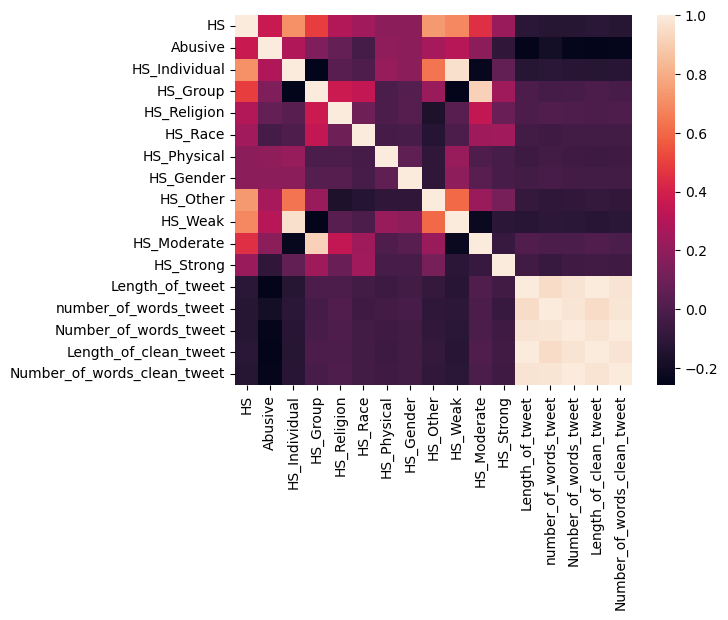

In [70]:
sns.heatmap(df.corr())

In [71]:
#dari sana kita akan coba mengabil data yang kira-kira memiliki korelasi relatif lebih tinggi

In [73]:
df.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong', 'cleaned_new_tweet', 'Length_of_tweet',
       'number_of_words_tweet', 'Number_of_words_tweet',
       'Length_of_clean_tweet', 'Number_of_words_clean_tweet'],
      dtype='object')

In [77]:
df_corr=df.drop(['number_of_words_tweet','HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],axis=1)

In [79]:
df_corr.columns

Index(['Tweet', 'HS', 'Abusive', 'cleaned_new_tweet', 'Length_of_tweet',
       'Number_of_words_tweet', 'Length_of_clean_tweet',
       'Number_of_words_clean_tweet'],
      dtype='object')

In [81]:
df_corr=df_corr[['Tweet','Length_of_tweet','Number_of_words_tweet','cleaned_new_tweet','Length_of_clean_tweet','Number_of_words_clean_tweet','HS', 'Abusive'
        ]]

In [82]:
df_corr

,Tweet,Length_of_tweet,Number_of_words_tweet,cleaned_new_tweet,Length_of_clean_tweet,Number_of_words_clean_tweet,HS,Abusive
0,- disaat semua cowok berusaha melacak perhatia...,128,21,di saat semua cowok berusaha melacak perhatian...,128,21,1,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,120,20,rt pengguna pengguna siapa yang telat memberi ...,120,20,0,1
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",250,38,41 kadang aku berpikir kenapa aku tetap percay...,250,38,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,13,pengguna pengguna aku itu akunnku tau matamu t...,75,13,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,81,12,pengguna pengguna kaum kafir sudah kelihatan d...,81,12,1,1
...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,66,10,pengguna jangan asal berbicara ndasmu kamu yan...,66,10,1,1
13165,USER Kasur mana enak kunyuk',24,4,pengguna kasur mana enak,24,4,0,1
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,50,8,pengguna hati hati gnnlagi bosan duh xf0x9fx9...,50,8,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,150,22,pengguna pengguna pengguna pengguna bom yang r...,150,22,0,0


In [83]:
#dari sini kita coba lihat kembali apa hubungannnya

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1112\2101688139.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr())


<Axes: >

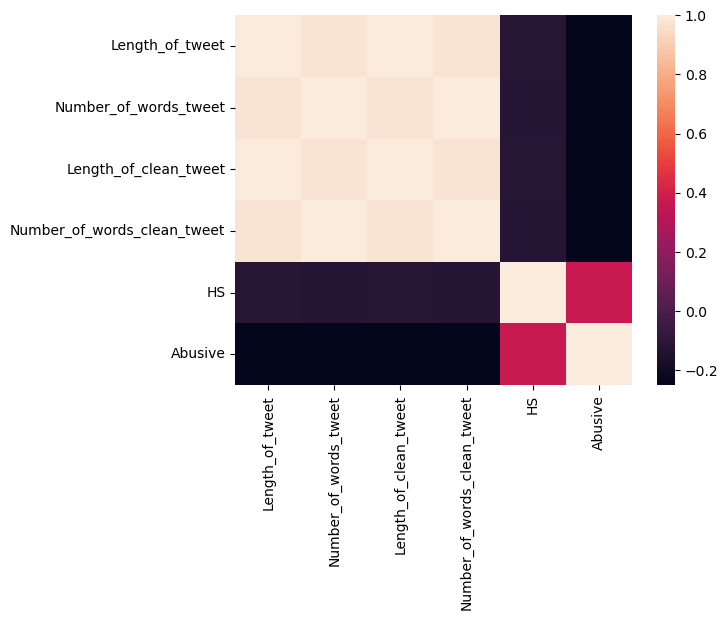

In [84]:
sns.heatmap(df_corr.corr())

In [85]:
df_corr.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1112\191381569.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr.corr()


,Length_of_tweet,Number_of_words_tweet,Length_of_clean_tweet,Number_of_words_clean_tweet,HS,Abusive
Length_of_tweet,1.000000,0.973410,1.000000,0.973410,-0.118947,-0.250159
Number_of_words_tweet,0.973410,1.000000,0.973410,1.000000,-0.126906,-0.245276
Length_of_clean_tweet,1.000000,0.973410,1.000000,0.973410,-0.118947,-0.250159
Number_of_words_clean_tweet,0.973410,1.000000,0.973410,1.000000,-0.126906,-0.245276
HS,-0.118947,-0.126906,-0.118947,-0.126906,1.000000,0.365292
Abusive,-0.250159,-0.245276,-0.250159,-0.245276,0.365292,1.000000


In [86]:
#dapat dilihat korelasi yang berdekatan dan bandingkan dengan ukuran korelasi

In [90]:
korelasi={"Interval Koefisien":["0,0-0,19","0,2-0,39","0,4-0,59","0,6-0,79","0,8-1"],"tingkat Hubungan":["Sangat rendah","Rendah","Sedang","Kuat","Sangat kuat"]}

In [91]:
korelasi=pd.DataFrame(korelasi)

In [92]:
korelasi

,Interval Koefisien,tingkat Hubungan
0,"0,0-0,19",Sangat rendah
1,"0,2-0,39",Rendah
2,"0,4-0,59",Sedang
3,"0,6-0,79",Kuat
4,"0,8-1",Sangat kuat


In [93]:
#dapat dilihat korelasi sangant kuat adalah setiap kombinasi'Tweet','Length_of_tweet','Number_of_words_tweet','cleaned_new_tweet','Length_of_clean_tweet','Number_of_words_clean_tweet') 
#dapat dilihat korelasi rendah Abusive dengan 'HS',Tweet','Length_of_tweet','Number_of_words_tweet','cleaned_new_tweet','Length_of_clean_tweet','Number_of_words_clean_tweet'
#dapat dilihat korelasi sangat rendah HS dengan 'Tweet','Length_of_tweet','Number_of_words_tweet','cleaned_new_tweet','Length_of_clean_tweet','Number_of_words_clean_tweet'
#informasi menarik terdapat kecenderungan positif rendah, antara Abusive dan HS, artinya semakin tinggi penggunaan abusive maka terdapat kecenderungan rendah semakin tinggi pula penggunaan HS